# Lab 2: OFDM Construction

### 🎛️ Modulation Scheme Selector
You can now select from multiple digital modulation schemes below:

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

def generate_constellation(mod_type):
    if mod_type == 'BPSK':
        return np.array([1, -1])
    elif mod_type == 'QPSK':
        return np.array([1+1j, -1+1j, -1-1j, 1-1j]) / np.sqrt(2)
    elif mod_type == '16qpsk':
        re = np.array([-3, -1, 1, 3])
        im = np.array([-3, -1, 1, 3])
        return (re[:, None] + 1j * im[None, :]).flatten() / np.sqrt(10)
    elif mod_type == '64QAM':
        levels = np.array([-7, -5, -3, -1, 1, 3, 5, 7])
        return (levels[:, None] + 1j * levels[None, :]).flatten() / np.sqrt(42)
    else:
        raise ValueError("Unsupported modulation type")

def plot_constellation(mod_type):
    constellation = generate_constellation(mod_type)
    plt.figure(figsize=(5, 5))
    plt.plot(np.real(constellation), np.imag(constellation), 'o')
    plt.grid(True)
    plt.title(f"{mod_type} Constellation Diagram")
    plt.xlabel("In-phase (I)")
    plt.ylabel("Quadrature (Q)")
    plt.axis('equal')
    plt.show()

interact(plot_constellation, mod_type=Dropdown(options=['BPSK', 'QPSK', '16QAM', '64QAM'], value='QPSK'));


interactive(children=(Dropdown(description='mod_type', index=1, options=('BPSK', 'QPSK', '16QAM', '64QAM'), va…

## Introduction

In this lab, you'll learn how to build an OFDM symbol using IFFT and Cyclic Prefix.

- Map QAM symbols to subcarriers
- Apply IFFT
- Add cyclic prefix
- Plot time-domain waveform

## 1. Parameters

In [10]:
num_subcarriers = 64
cp_length = 16
mod_type = 'QPSK'
num_symbols = 1

## 2. Bit and Symbol Generation

In [13]:
import numpy as np
from numpy.fft import ifft
import matplotlib.pyplot as plt

def generate_bits(mod_type, N):
    bits = np.random.randint(0, 2, N)
    return bits

def qam_modulate(bits, mod_type):
    if mod_type == 'QPSK':
        return (1 - 2*bits[0::2] + 1j*(1 - 2*bits[1::2])) / np.sqrt(2)
    raise NotImplementedError

## 3. OFDM Symbol Creation

In [21]:
bits = generate_bits(mod_type, num_subcarriers * 2)

symbols = qam_modulate(bits, mod_type)


ofdm_grid = np.zeros(num_subcarriers, dtype=complex)

print(ofdm_grid)
ofdm_grid[0:len(symbols)+1] = symbols

ofdm_time = ifft(ofdm_grid)
cp = ofdm_time[-cp_length:]
ofdm_tx = np.concatenate([cp, ofdm_time])

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


## 4. Plot Time-Domain Signal

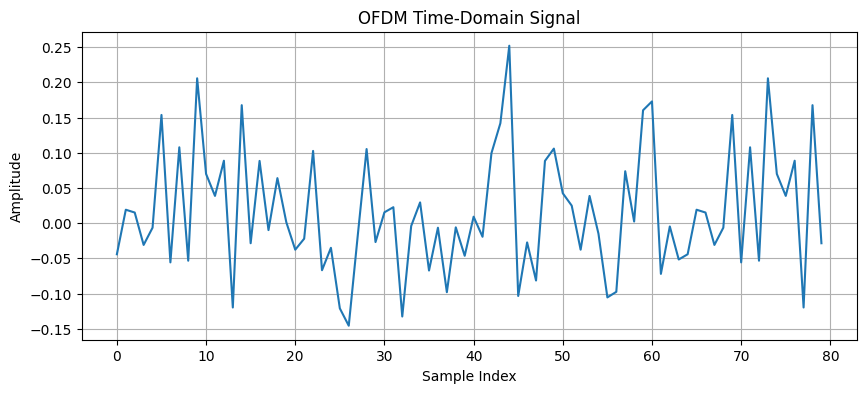

In [16]:
plt.figure(figsize=(10,4))
plt.plot(np.real(ofdm_tx))
plt.title('OFDM Time-Domain Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()